<a href="https://colab.research.google.com/github/MaLuisa7/Machine_Learning_Lessons/blob/main/TAREAS_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 2 

1. Crear, modificar o eliminar columnas
2. Filtrar registros
3. Crear subconjuntos de datos
4. Crear grupos de datos 

## 0. Preparación de datos

In [1]:
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime
import seaborn as sns

In [3]:
# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
ticker = yf.Ticker('SPY')
end_date = '2023-01-23'
start_date = '2018-01-23'
sp500 = ticker.history(start=start_date,end=end_date)
print("Shape of SP 500 data is:", sp500.shape)
sp500.head(2)

Shape of SP 500 data is: (1258, 8)


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,0.0,0.0,0.0
2018-01-24 00:00:00-05:00,260.768207,261.392559,258.766684,259.996979,134816100,0.0,0.0,0.0


In [4]:
sp500.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,0.0,0.0,0.0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.0,0.0,0.0


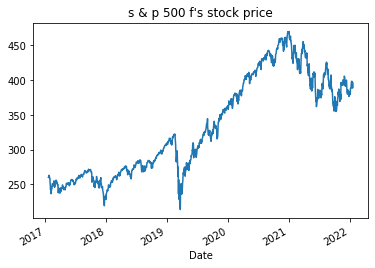

In [5]:
sp500['Close'].plot(title="s & p 500 f's stock price")

## 1. Crear, modificar o eliminar columnas

### Obtenemos retornos 

Info: [Calculate daily returns](https://towardsdatascience.com/calculate-and-plot-s-p-500-daily-returns-2ce359e014d6)

In [6]:
sp500['daily_return'] = (sp500['Close']/ sp500['Close'].shift(1)) -1
sp500.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,daily_return
Date,,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,0.0,0.0,0.0,NaN
2018-01-24 00:00:00-05:00,260.768207,261.392559,258.766684,259.996979,134816100,0.0,0.0,0.0,-0.000388


### Por el momento, se descartan las columnas: Dividends	Stock Splits	Capital Gains

In [7]:
sp500.drop(columns = ['Dividends', 'Stock Splits', 'Capital Gains',], inplace = True)

In [8]:
sp500.head(2)

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN
2018-01-24 00:00:00-05:00,260.768207,261.392559,258.766684,259.996979,134816100,-0.000388


## 2. Filtrar datos

Filtraremos todo el mes de agosto del año pasado

In [9]:
sp500[(sp500.index >= '2022-08-01') & (sp500.index <'2022-09-01')]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2022-08-01 00:00:00-04:00,405.613551,409.836739,404.870033,407.219543,69997500,-0.002961
2022-08-02 00:00:00-04:00,405.583856,409.430325,403.303747,404.533020,63435400,-0.006597
2022-08-03 00:00:00-04:00,406.753613,412.087117,406.456218,410.867767,67820600,0.015659
2022-08-04 00:00:00-04:00,410.788463,411.502241,408.875152,410.590210,45656600,-0.000676
2022-08-05 00:00:00-04:00,406.119174,410.570356,406.059695,409.896240,56814900,-0.001690
2022-08-08 00:00:00-04:00,411.660855,414.010366,408.270402,409.420380,53886100,-0.001161
2022-08-09 00:00:00-04:00,408.657062,409.182480,406.674348,407.794586,44931800,-0.003971
2022-08-10 00:00:00-04:00,415.160330,416.508591,413.118138,416.359863,68665700,0.021004
2022-08-11 00:00:00-04:00,419.333933,421.277014,415.586606,416.359863,59489700,0.000000


Filtraremos aquellos días en los que el close fue mayor al open.

In [10]:
sp500[(sp500.Close > sp500.Open) ]

,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN
2018-01-26 00:00:00-05:00,260.979384,263.164545,260.713117,263.118622,107743100,0.011578
2018-02-01 00:00:00-05:00,258.059725,259.886801,257.701640,258.527954,90102500,-0.001135
2018-02-06 00:00:00-05:00,238.659522,247.620511,237.521046,247.097168,355026800,0.019702
2018-02-09 00:00:00-05:00,239.449123,242.029075,232.214243,240.091827,283565300,0.015022
...,...,...,...,...,...,...
2023-01-10 00:00:00-05:00,387.250000,390.649994,386.269989,390.579987,65358100,0.007013
2023-01-11 00:00:00-05:00,392.230011,395.600006,391.380005,395.519989,68881100,0.012648
2023-01-12 00:00:00-05:00,396.670013,398.489990,392.420013,396.959991,90157700,0.003641


## 3. Crear subconjuntos de datos

A continuación, separaremos el dataframe en tres subconjuntos, aquellos días en los que los retornos fueron mayores a cero, otro en donde los retornos fueron menores a 0 y finalmente, en donde los retornos fueron iguales a cero.

In [11]:
positive_returns = sp500.query("daily_return > 0")
negative_returns = sp500.query("daily_return < 0")
zero_returns =   sp500.query("daily_return == 0")

In [12]:
print("Shape of positive returns df is: ", positive_returns.shape)
positive_returns.head(2)

Shape of positive returns df is:  (679, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000423
2018-01-26 00:00:00-05:00,260.979384,263.164545,260.713117,263.118622,107743100,0.011578


In [13]:
print("Shape of negative returns df is: ", negative_returns.shape)
negative_returns.head(2)

Shape of negative returns df is:  (575, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-01-24 00:00:00-05:00,260.768207,261.392559,258.766684,259.996979,134816100,-0.000388
2018-01-29 00:00:00-05:00,262.521751,262.980817,261.208827,261.374084,90118300,-0.006630


In [14]:
print("Shape of zero returns df is: ", zero_returns.shape)
zero_returns.head(2)

Shape of zero returns df is:  (3, 6)


,Open,High,Low,Close,Volume,daily_return
Date,,,,,,
2018-05-08 00:00:00-04:00,245.662464,246.427554,244.418014,246.049637,67499200,0.0
2018-10-08 00:00:00-04:00,266.996999,268.085277,265.555292,267.713226,87742200,0.0


## 4. Crear grupos de datos

In [15]:
sp500['month'] =sp500.index.month

In [16]:
month_mean = sp500.groupby('month').mean()
month_mean

,Open,High,Low,Close,Volume,daily_return
month,,,,,,
1,341.552223,343.741628,338.978684,341.609284,9.037117e+07,0.000472
2,325.897313,328.312288,323.470602,325.891088,1.053835e+08,-0.000864
3,317.592477,320.831254,314.373425,317.753755,1.337301e+08,-0.000200
4,322.164534,324.215643,319.714847,321.948075,8.986392e+07,0.001304
5,318.287495,320.544004,315.803610,318.426055,8.883967e+07,0.000205
6,325.582062,327.326635,323.388632,325.396580,8.055543e+07,0.000331
7,330.268337,332.143905,328.616420,330.910758,6.360371e+07,0.002116
8,341.980178,343.599749,340.371569,342.126209,6.383250e+07,0.000671
9,340.726162,342.519833,338.065005,340.124165,7.932465e+07,-0.001487


In [17]:
month_mean['classification_daily_return'] = [ 1  if x>0 else 0 for x in  month_mean.daily_return ]
month_mean

,Open,High,Low,Close,Volume,daily_return,classification_daily_return
month,,,,,,,
1,341.552223,343.741628,338.978684,341.609284,9.037117e+07,0.000472,1
2,325.897313,328.312288,323.470602,325.891088,1.053835e+08,-0.000864,0
3,317.592477,320.831254,314.373425,317.753755,1.337301e+08,-0.000200,0
4,322.164534,324.215643,319.714847,321.948075,8.986392e+07,0.001304,1
5,318.287495,320.544004,315.803610,318.426055,8.883967e+07,0.000205,1
6,325.582062,327.326635,323.388632,325.396580,8.055543e+07,0.000331,1
7,330.268337,332.143905,328.616420,330.910758,6.360371e+07,0.002116,1
8,341.980178,343.599749,340.371569,342.126209,6.383250e+07,0.000671,1
9,340.726162,342.519833,338.065005,340.124165,7.932465e+07,-0.001487,0


In [18]:
month_mean.groupby('classification_daily_return').mean()

,Open,High,Low,Close,Volume,daily_return
classification_daily_return,,,,,,
0,334.216997,336.584716,331.484883,334.032204,1.019806e+08,-0.000720
1,332.538513,334.541796,330.365166,332.629518,7.982632e+07,0.000982


# Tarea 3: Clase 23 enero 2023

## Tarea 3 de salón de clases con valor de 2 puntos.

In [19]:
data =  list(sp500.daily_return.dropna())
data[:5]

[-0.0003880140159063794,
 0.0004234950052122155,
 0.011578060746980867,
 -0.006630231419607169,
 -0.010256977881085483]

### Media

In [20]:
data1 = list(sp500.daily_return.dropna())

In [21]:
def promedio(data):
  sum_data = 0 
  for item in data:
    sum_data = item + sum_data

  mean =  sum_data / len(data)
  return mean 
  

In [22]:
promedio(data1)

0.00042736449199762267

### Mediana

In [23]:
def mediana(data):
  data.sort()
  half =int( len(data)/2)
  if len(data)%2==0:
    median = (data[half -1] + data[half]) /2
  else:
    median =  data[half]
  return median


In [24]:
mediana( data1)

0.0007278775474885979

### Desviación Estandar

In [25]:
def standard_deviation(data):
  lst1 = []
  b  = 0 
  average = promedio(data)
  for item in data:
    a = (item - average)**2
    b = a + b
  c = b/len(data)
  d = np.sqrt(c)
  return d 

In [26]:
sp500.daily_return.dropna().describe()

count    1257.000000
mean        0.000427
std         0.013617
min        -0.109424
25%        -0.005229
50%         0.000728
75%         0.007150
max         0.090603
Name: daily_return, dtype: float64

### Comprueba  si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

* $H_0$: Los datos provienen de una distribución normal

* $H_1$: Los datos no provienen de una distribución normal

Se conoce que se rechaza $H_0$ si $pvalor < \alpha$

In [27]:
# from scipy.stats import shapiro
from scipy import stats 

def prueba_normalidad(data, valor_alfa):
  stat, pvalor = stats.shapiro(data)
  pvalor = round(pvalor,4)
  if pvalor < valor_alfa:
      return print('Se rechaza H0, los datos no provienen de una distribución normal ya que , p-valor< alfa = ', pvalor)
  else:
      return print('No se rechaza H0, los datos provienen de una distribución normal ya que , p-valor>alfa = ', pvalor)

prueba_normalidad(data1, 0.05)

Se rechaza H0, los datos no provienen de una distribución normal ya que , p-valor< alfa =  0.0


## Tarea 3 (8 puntos)

1. Calcula estadísticos descriptivos básicos para tus datos
2. Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
3. Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
4. Presenta tus resultados gráficamente 

In [28]:
sp500['classification_daily_return'] = [ 1  if x>0 else 0 for x in  sp500.daily_return ]
sp500.head(5)

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2018-01-23 00:00:00-05:00,259.592910,260.400872,259.253206,260.097900,97084700,NaN,1,0
2018-01-24 00:00:00-05:00,260.768207,261.392559,258.766684,259.996979,134816100,-0.000388,1,0
2018-01-25 00:00:00-05:00,260.896695,260.997676,259.280772,260.107086,84587300,0.000423,1,1
2018-01-26 00:00:00-05:00,260.979384,263.164545,260.713117,263.118622,107743100,0.011578,1,1
2018-01-29 00:00:00-05:00,262.521751,262.980817,261.208827,261.374084,90118300,-0.006630,1,0


In [29]:
sp500.tail(5)

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
Date,,,,,,,,
2023-01-13 00:00:00-05:00,393.619995,399.100006,393.339996,398.500000,63863400,0.003880,1,1
2023-01-17 00:00:00-05:00,398.480011,400.230011,397.059998,397.769989,62677300,-0.001832,1,0
2023-01-18 00:00:00-05:00,399.010010,400.119995,391.279999,391.489990,99632300,-0.015788,1,0
2023-01-19 00:00:00-05:00,389.359985,391.079987,387.260010,388.640015,86958900,-0.007280,1,0
2023-01-20 00:00:00-05:00,390.100006,396.040009,388.380005,395.880005,91544900,0.018629,1,1


#### 1.Estadísticos descriptivos del conjunto de datos 

In [30]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2018-01-23 00:00:00-05:00 to 2023-01-20 00:00:00-05:00
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Open                         1258 non-null   float64
 1   High                         1258 non-null   float64
 2   Low                          1258 non-null   float64
 3   Close                        1258 non-null   float64
 4   Volume                       1258 non-null   int64  
 5   daily_return                 1257 non-null   float64
 6   month                        1258 non-null   int64  
 7   classification_daily_return  1258 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 120.7 KB


In [31]:
sp500.describe()

,Open,High,Low,Close,Volume,daily_return,month,classification_daily_return
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1257.000000,1258.000000,1258.000000
mean,333.066457,335.193010,330.709322,333.069050,8.714210e+07,0.000427,6.549285,0.539746
std,70.957683,71.315180,70.532269,70.973158,4.581893e+07,0.013617,3.426631,0.498616
min,218.810104,220.238847,209.288275,213.785492,2.027000e+07,-0.109424,1.000000,0.000000
25%,267.545163,268.803384,265.733613,267.661873,5.780208e+07,-0.005229,4.000000,0.000000
50%,316.465157,318.183928,315.290874,316.553253,7.577835e+07,0.000728,7.000000,1.000000
75%,398.662768,401.085747,394.952691,398.056412,1.020921e+08,0.007150,10.000000,1.000000
max,471.569561,472.317438,468.459983,470.083649,3.922207e+08,0.090603,12.000000,1.000000


#### 2. Matriz de correlaciones

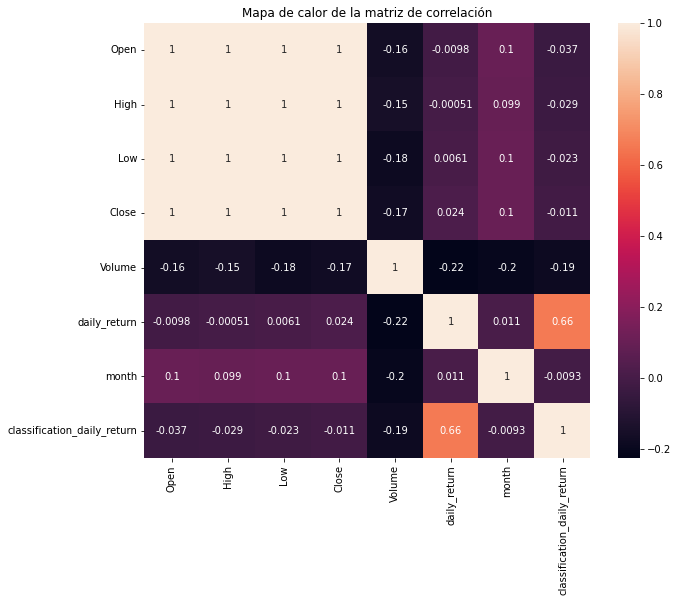

In [32]:
corr_sp500 = sp500.corr()
plt.figure(figsize=(10,8))
plt.title("Mapa de calor de la matriz de correlación")
sns.heatmap(data=corr_sp500,  annot=True)

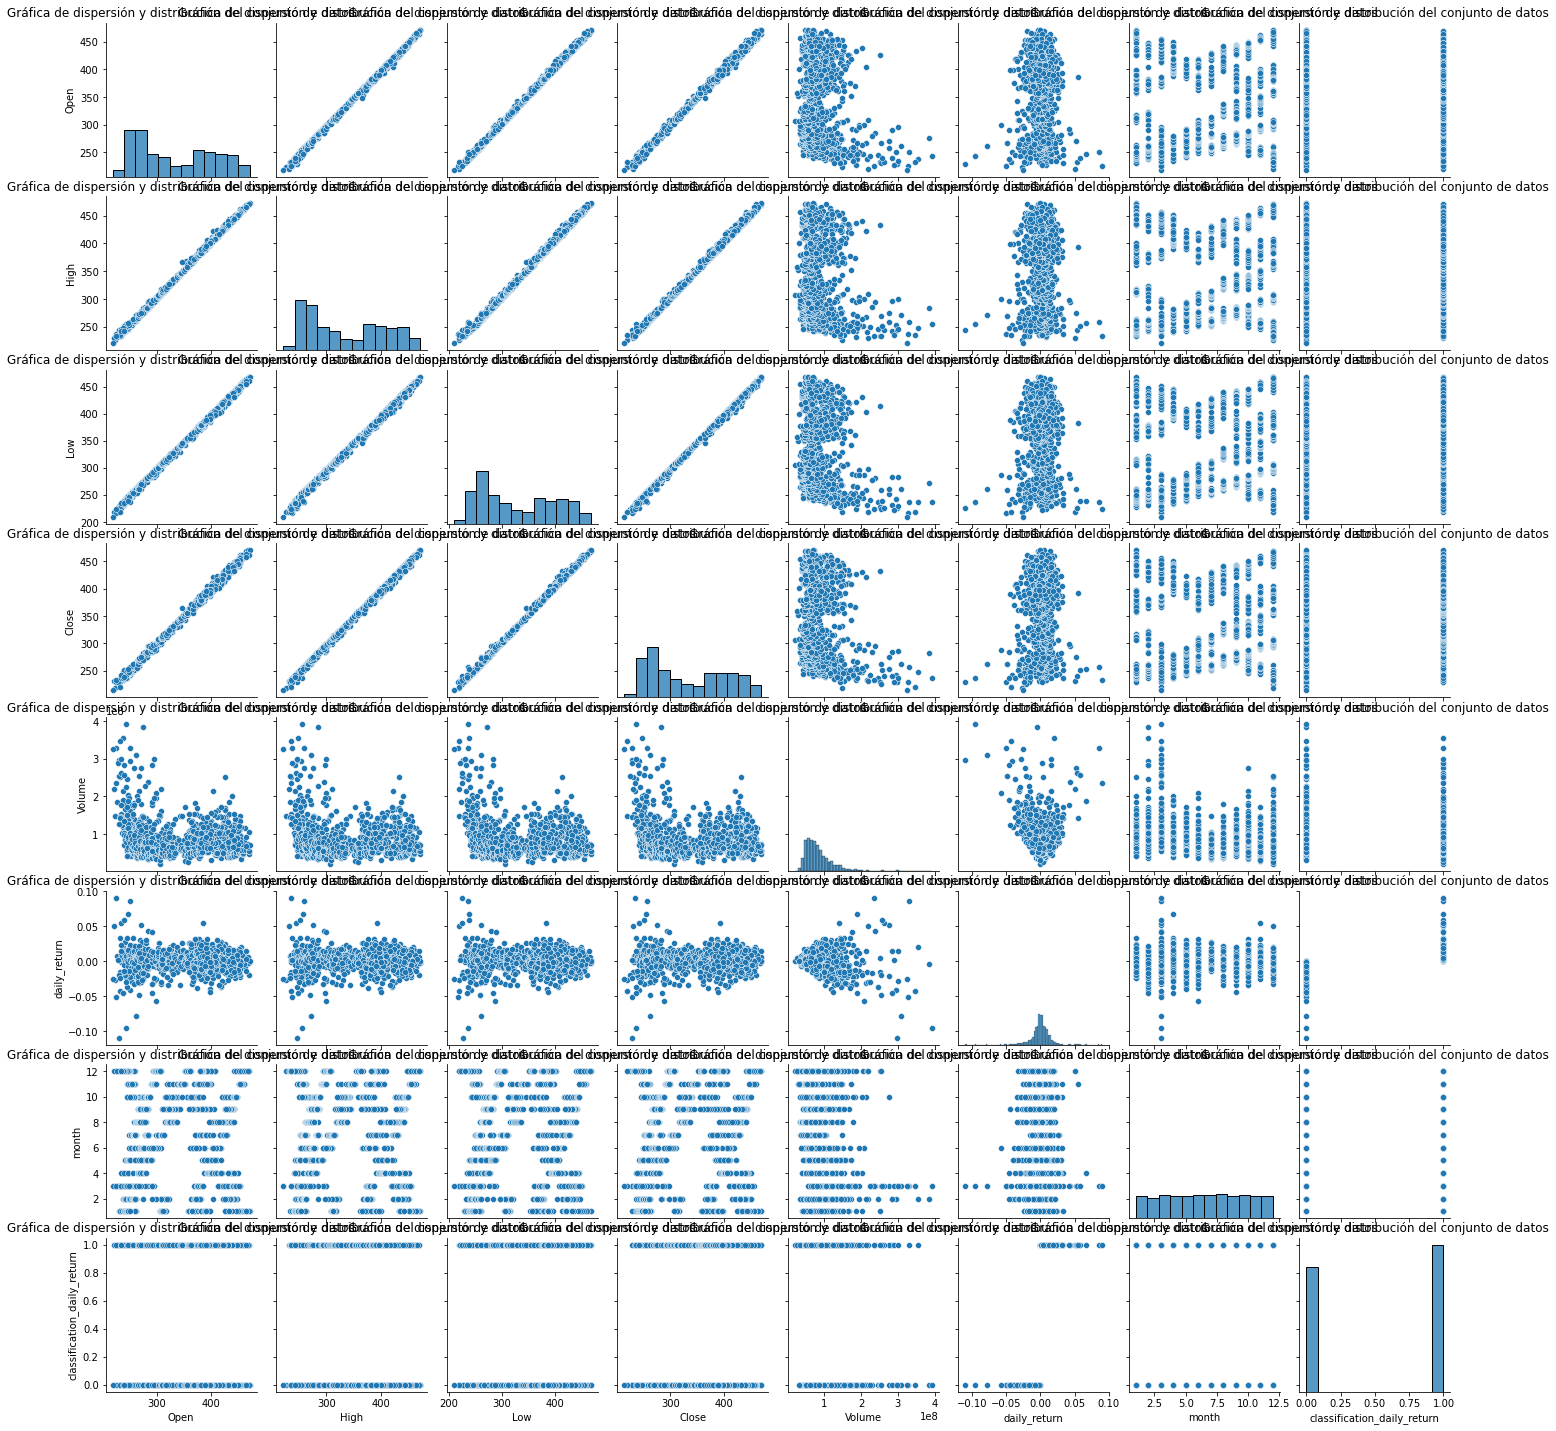

In [33]:
sns.pairplot(sp500).set(title= "Gráfica de dispersión y distribución del conjunto de datos")

* Clasificación del retorno, ya sea positivo (1) o negativo(0). 

* Interpretación:

  * Es posible interpretar que tanto las variables de: Open (Apertura), High (Alto), Low (Bajo) y Close (Cierre) se correlacionan positiva  y crecientemente.

  * La variable month (mes) no presenta correlación alguna con otras variables.
 
  * La variable Volumen tiene correlación negativa cercana a cero con todas las variables.

  * La variable daily returns (retornos diarios) presenta correlacion cercana a cero con casi todas las variables, menos con clasification daily returns o clasificación de retornos diarios, lo cual tiene sentido.

  * La variable clasification daily returns o clasificación de retornos diariospresenta correlacion cercana a cero con casi todas las variables, menos con retornos diarios, lo cual tiene sentido.



#### 3. Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación

Partiendo de la matriz de correlaciones y los gráficos mostrados, se observo que la variable volumen tiene una distribución exponencial. Por lo cual se plantea la siguiente hipótesis:

* Hipótesis nula $H_0$: El conjunto de datos proviene de una distrubución exponencial.  
* Hipótesis alternativa $H_1$ El conjunto de datos no proviene de una distrubución exponencial.  


In [34]:
import statsmodels.api as sm
ks, pval = sm.stats.diagnostic.lilliefors(sp500.Volume, dist = 'exp' )
print('pvalor es: ', pval)

pvalor es:  0.0009999999999998899


#### 4. Presenta tus resultados gráficamente.


[Text(0.5, 1.0, 'Histograma de la variable volumen')]

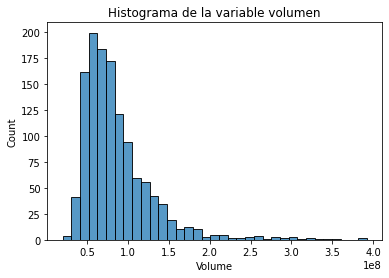

In [35]:
caja = int(np.sqrt(len(sp500)))
sns.histplot(sp500.Volume, bins =caja ).set(title= "Histograma de la variable volumen")

* Por tanto si pvalor es 0.000999 y tomando en cuenta un $\alpha$ = 0.05, se rechaza $H_0$ si pvalor es menor a $\alpha$, se observa que pvalor = 0.000999 < 0.05, por tanto se rechaza $H_0$ y los datos provienen de una distribución que no es la exponencial.

#### Extras: Otro tipo de gráficos que nos apoyan en el análisis descriptivo.

* Más gráficos

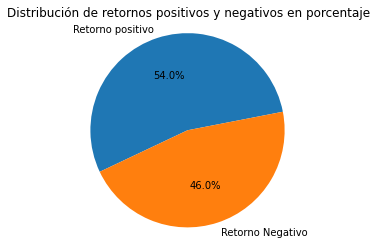

In [36]:
label = 'Retorno positivo', 'Retorno Negativo'
percent = [ 53.97, 46.02]

fig1, ax1 = plt.subplots()
ax1.pie(percent ,labels=label, autopct='%1.1f%%',
        shadow=False, startangle=11)
ax1.axis('equal')  
plt.title("Distribución de retornos positivos y negativos en porcentaje")
plt.show()

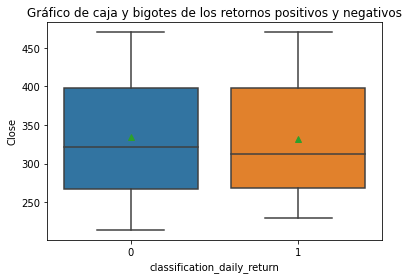

In [37]:
sns.boxplot(x='classification_daily_return',y='Close', data=sp500, showmeans=True)
plt.title("Gráfico de caja y bigotes de los retornos positivos y negativos")

plt.show()

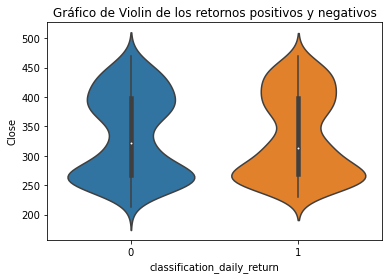

In [38]:
plt.title("Gráfico de Violin de los retornos positivos y negativos")

sns.violinplot(x='classification_daily_return', y='Close', data=sp500)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


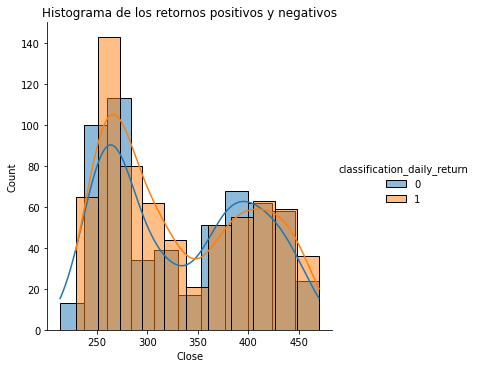

In [39]:
sns.FacetGrid(sp500, hue="classification_daily_return", size=5).map(sns.histplot, "Close",kde='True').add_legend().set(title= "Histograma de los retornos positivos y negativos")

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


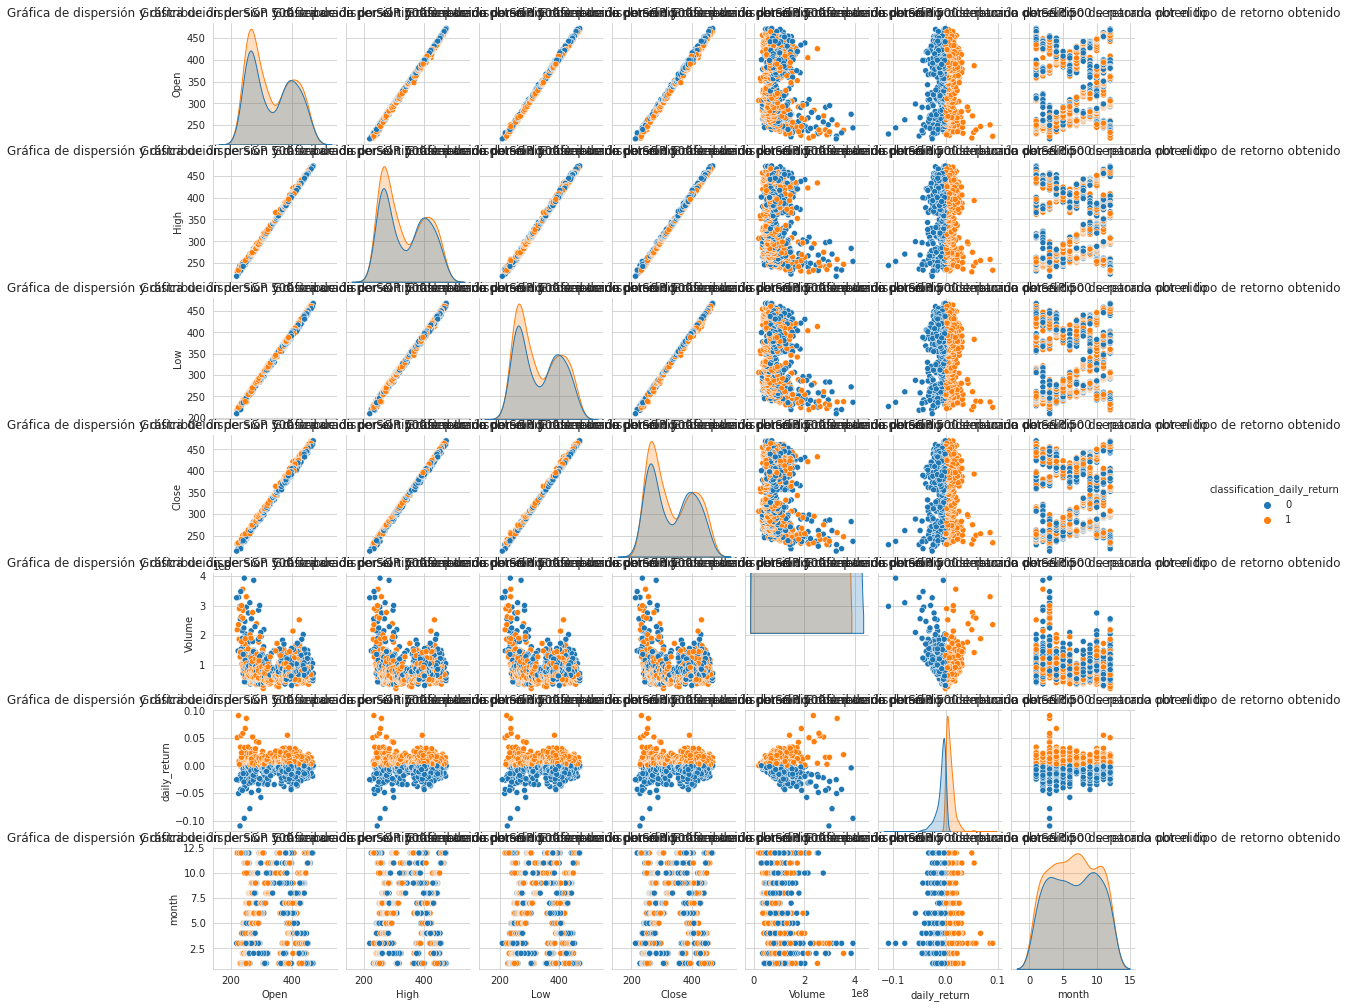

In [40]:
sns.set_style("whitegrid");
sns.pairplot(sp500,hue='classification_daily_return', size=2).set(title='Gráfica de dispersión y distribución de S&P 500 separada por el tipo de retorno obtenido')
plt.show()


# Clase 4: 30-01-2023 

## Tarea en clase: 2 puntos

Aplica algúm método de filtro a tus datos mediante el uso de SelectKBest 

In [54]:
X = sp500.loc[:,['Open', 'High', 'Low', 'Close', 'Volume']]
y = sp500.loc[:,['classification_daily_return']]

In [72]:
from sklearn.feature_selection import SelectKBest, chi2
colnames = list(X.columns)
num_k = 1

for num_k in range(1, 5):
  select_class = SelectKBest(k=num_k, score_func=chi2)
  select_class.fit(X, y)
  X_new = select_class.transform(X)
  print("Número de características originalmente:", X.shape[1])
  print("Número de características después del método SelectKBest:", X_new.shape[1])
  print("Arreglo de característica(s) que tienen más importancia:",np.array(colnames)[select_class.get_support()] )# features[filter])
  nuevas_caracteristicas = pd.DataFrame(X_new)
  display(nuevas_caracteristicas.head())
  print(80*'_')

Número de características originalmente: 5
Número de características después del método SelectKBest: 1
Arreglo de característica(s) que tienen más importancia: ['Volume']


,0
0,97084700.0
1,134816100.0
2,84587300.0
3,107743100.0
4,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 2
Arreglo de característica(s) que tienen más importancia: ['Open' 'Volume']


,0,1
0,259.592910,97084700.0
1,260.768207,134816100.0
2,260.896695,84587300.0
3,260.979384,107743100.0
4,262.521751,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 3
Arreglo de característica(s) que tienen más importancia: ['Open' 'High' 'Volume']


,0,1,2
0,259.592910,260.400872,97084700.0
1,260.768207,261.392559,134816100.0
2,260.896695,260.997676,84587300.0
3,260.979384,263.164545,107743100.0
4,262.521751,262.980817,90118300.0


________________________________________________________________________________
Número de características originalmente: 5
Número de características después del método SelectKBest: 4
Arreglo de característica(s) que tienen más importancia: ['Open' 'High' 'Low' 'Volume']


,0,1,2,3
0,259.592910,260.400872,259.253206,97084700.0
1,260.768207,261.392559,258.766684,134816100.0
2,260.896695,260.997676,259.280772,84587300.0
3,260.979384,263.164545,260.713117,107743100.0
4,262.521751,262.980817,261.208827,90118300.0


________________________________________________________________________________


Se puede concluir que todas las variables resultaron ser TRUE y aportan a la variable de respuesta.